# Neural Collaborative Filtering

### Table of Contents
#### Introduction
* Intro
* Main Contribution

#### Prelliminaries
* Learning from Implicit Data
* Matrix Factorization

#### Neural Collaborative Filtering
* General Framework
* Generalized Matrix Factorization
* Multi Layer Perceptron
* Fusion of GMF and MLP - NeuMF

----

## 1. Introduction
### Intro

정보가 지나치게 많이 쏟아지고 있는 요즘, **Recommendation System**은 감당 할 수 있는 수준으로 정보를 걸러주는 중요한 역할을 한다.

그리고 기존의 논문들 대부분은 Matrix Factorization에 기반하였다.

하지만 Matrix Factorization은 user와 item 사이의 linearity만 표현 할 수 있기때문에, 보다 고차원의 관계를 표현하는 데에 한계가 있다.

따라서 **Deep Neural Network**을 RecSys에 도입하여 user와 item간의 보다 복잡한 관계를 표현하려 한다.

### Main Contribution
1. Neural Network architecture를 이용하여 Collaborative Filtering을 기반으로한 NCF model을 구현하였다.
2. MF가 NCF의 특수한 경우임을 보였으며, Multi-Layer Perceptron을 이용해 non-linearity를 포착 할 수 있게 되었다.
3. 두 개의 real-world datasets에 NCF를 적용하여 그 실효성을 입증하였다.

---

## 2. Preliminaries
### Learning from Implicit Data
**Implicit Data**: 직접적인 평가가 아닌, **user와 item간의 상호작용**을 일컫는다. 예를 들어, user의 item 열람 기록, 시청 기록, 구매 기록 등이 있다.
#### 장점
* explicit feedback에 비해, implicit feedback이 훨씬 더 자주 일어난다.
* automatic하게 수집하기 쉽다.

#### 단점
* 직접적인 user의 만족도를 측정 할 수 없다.
* **Negative Feedback**을 인지하기 어렵다.
      특정 user와 item간의 상호작용이 일어나지 않았다고 해서, user가 그 item을 싫어하는걸까?
      단순히 존재를 몰랐거나, 아무 생각없이 지나쳤을 수도 있음!
      
 
      
#### Implicit Data Matrix
$$ \begin{equation}
y_{ui}=
\begin{cases}
0, & \text{if there is interaction between}\ u\,and\, i \\
1, & \text{otherwise}
\end{cases}
\end{equation} $$

위에서 언급되었듯이, $y_{ui} = 0$ 이라고 해서 user u가 item i를 싫어하는 것이 아님!

#### Objective
$\hat{y}_{ui} = f(u,i|\theta)$ 를 찾는 것이 목적이다. ($\hat{y}_{ui}$ denotes score of interaction $y_{ui}$)

#### Loss Function
* Pointwise Loss: $min {1 \over 2}(\hat{y}_{ui} - y_{ui})^2 $
* Pairwise Loss: $max(0, f(y_{unobs}) - f(y_{obs}) + \alpha) $

NCF model은 neural network을 이용하여 interaction function *f*를 parameterize하므로, 두 loss function 모두를 이용 할 수 있다.

### Matrix Factorization

**Matrix Factorization**: associates user and item by linearly combining their latent vector!

따라서 MF는 **inner product**를 user와 item 사이의 관게를 파악하는데에 사용한다. 하지만 이는 다음과 같은 문제를 초래한다.
* latent factor의 dimension이 **낮은** 경우
        여러 명의 user간의 선호도 관계를 정확하게 표현 할 수 없다. 아래의 예시를 보면, user4는 user1, user3과 비슷하고 user2와는 다른 취향을 가지고 있으나 이를 2차원 상에서는 정확하게 표현 할 수가 없다.
* latent factor의 dimension이 **높은** 경우
        overfitting

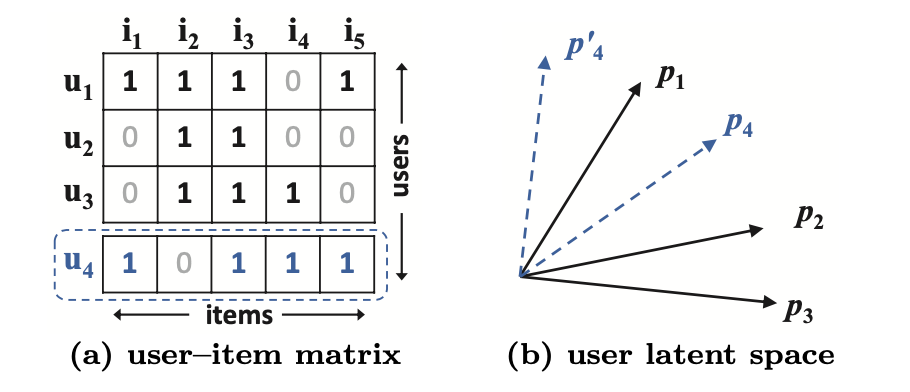

In [15]:
from PIL import Image
Image.open('Image/limitation_of_linearity.png')

따라서, latent factor의 dimension을 높이는 것을 제외한, user factor와 item factor간의 관계를 풍부하게 표현 할 수 있는 방법이 필요하다.

$\Rightarrow$ **Deep Neural Networks**

---
## 3. Neural Collaborative Filtering
### General  Framework

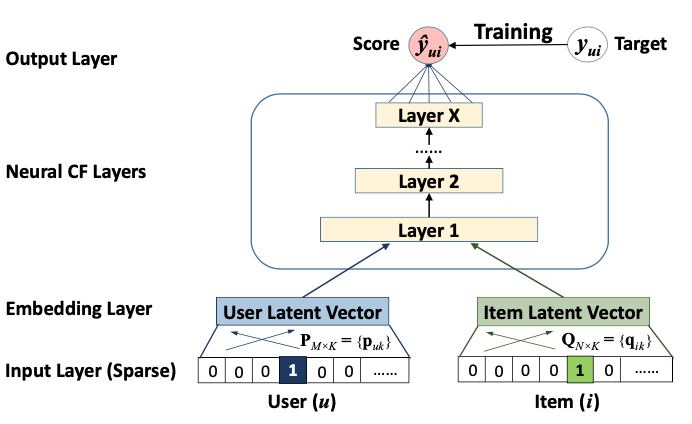

In [16]:
Image.open('Image/general_framework.png')

#### Layers
* Input Layer
    * two feature vectors: $v^U_u, v^I_i$ - represent user *u* and item *i* respectively. 
     $\rightarrow$ binarized sparse vector with one-hot encoding


* Embedding Layer
    * sparse vector를 dense vector로 transform하는 fully connected layer. 
    * Input layer에서 embedding layer로 가는 변환이 기존 MF의 *P*, *Q*에 해당한다.


* Nueral CF Layers
    * Embedding Layer의 user embedding과 item embedding을 input으로 받는 layer들. 여러 neural layer를 거쳐서 final output layer까지 도달.


* Output Layer
    * predicted score인 $\hat{y}_{ui}$를 반환. 


#### NCF Predictive Model
결국, NCF model은 다음과 같이 formulation 된다.

$$\hat{y}_{ui} = f(P^Tv^U_u, Q^Tv^I_i|P,Q,\Theta_f)$$

$$f(P^Tv^U_u, Q^Tv^I_i) = \phi_{out}(\phi_X(...\phi_2(\phi_1(P^Tv^U_u, Q^Tv^I_i))...))$$

where P, Q denotes latent factor matrix for users and items, and $\phi$ denotes mapping function for output/nueral CF layer

#### Learning NCF
model parameter를 학습하기 위한 기존의 pointwise method는 squared loss를 regression하는 과정이다. 하지만 이는 binary data인 implicit data와는 잘 맞지 않는다. 따라서, probabilistic  approach를 사용한다. 

*Objectvie Function*: $L= -\sum\limits_{(u,i)\in\mathbb{Y\cup Y^{-}}}{y_{ui}log{\hat{y}_{ui}} + (1-y_{ui})log{(1-\hat{y}_{ui})}}$

### Generalized Matrix Factorization
$p_u, q_i$를 user와 item의 latent vector라고 하면, MF에 해당하는 NCF의 first neural CF layer와 전체 model은

$$\phi(p_u, q_i) = p_u \odot q_i$$

$$\hat{y}_{ui} = a_{out}(h^T(p_u \odot q_i))$$

가 되며, $a_{out}$은 identity function이, $h^T$는 uniform vector가 된다.

### Multi Layer Perceptron
목적은 간단하다. user와 item간의 복잡한(non-linear한) 관계를 표현 할 방법을 찾는 것이다. 이를 가능하게 하기 위해 2가지 단계가 필요한데
1. user와 item data를 한번에 학습하기 위해 **concatenate**해야 한다.
2. non-linear한 관계를 포착하기 위해 **hidden layer**를 포함해야 한다.

Model은 다음과 같이 formulation 된다.
$$z_1= \phi(p_u, q_i) = [p_u, q_i]^T,$$

$$\phi_2(z_1)= a_2(W^T_2z_1 + b_2), ....,$$

$$\phi_L(z_{L-1})= a_L(W^T_Lz_{L-1} + b_L)$$

$$\hat{y}_{ui}= \sigma(h^T\phi_L(Z_{L-1}))$$

가 되며,
* $\sigma$ denotes sigmoid funciton
* activation functions of MLP layers: ReLU

### Fusion of GMF & MLP
마지막으로, GMF와 MLP를 결합한 model을 만든다면, linearity와 non linearity를 모두 포착 할 수 있을 것이다.

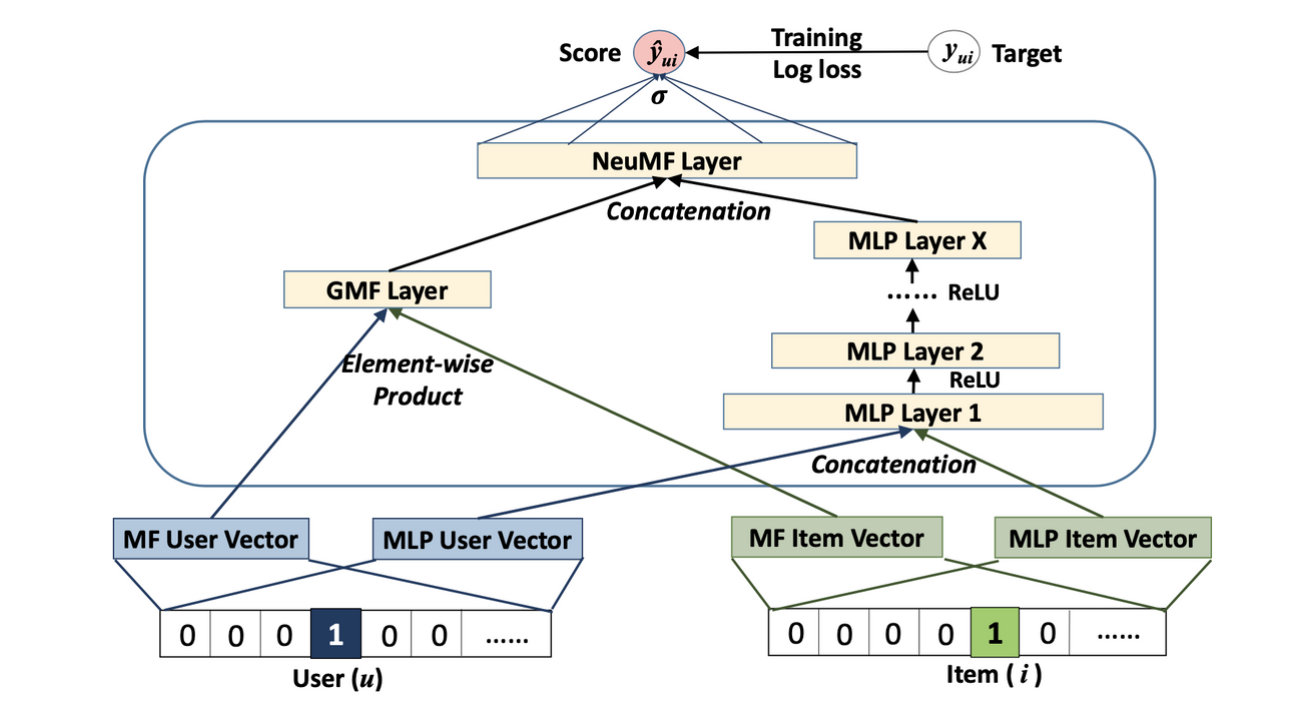

In [17]:
Image.open('Image/NeuMF.png')

#### GMF와 MLP를 fusion하는 방법?!
서로 다른 Embedding을 learning하고, 두 모델을 last hidden layer에서 concatenate한다.

$$\phi^{GMF}= p^G_u\odot q^G_i, $$

$$\phi^{MLP}= a_L(W^T_L(a_{L-1}(...a_2(W^T_2[p^M_u,q^M_i]^T +b_2)...)) +b_L),$$

$$\hat{y}_{ui}= \sigma(h^T[\phi^{GMF}, \phi{MLP}]^T)$$


#### Pre-Training
NeuMF의 objective function이 non-convex function이기 때문에, gradient-based optimizer들을 사용한다면 local optima에 빠질 가능성이 높다. 따라서, *initialization*이 중요성이 대두된다.

따라서 GMF와 MLP를 먼저 training하고, 그 parameter를 **NeuMF model의 초기값**으로 사용한다.

한 가지 주의할 점은, output layer의 경우 GMF와 MLP 두 model이 합쳐진다는 것이다. 따라서, 이 둘의 parameter를 어떠한 비율로 합칠 지 정해야  한다.

$$ h \leftarrow [\alpha h^{GMF}, (1-\alpha)h^{MLP}]^T$$
$$, \text{where alpha is a hyper parameter} $$